Without Stitching Unit

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df=pd.read_csv("manufacturing_data.csv")

In [122]:
df.shape

(1197, 15)

In [123]:
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


In [124]:
df.isnull().sum()

recordDate               0
fiscalQuarter            0
productionDept           0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
idleMinutes              0
idleWorkers              0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64

# feature selection


In [125]:
df['productionDept'].value_counts()

productionDept
Stitching Unit           691
 Finishing & Quality     257
Finishing & Quality      249
Name: count, dtype: int64

In [126]:
df = df.drop(columns=["idleMinutes", "idleWorkers","recordDate"])

#keeping only stitching unit 
df=df[df['productionDept']!= 'Stitching Unit']
df.head(10)

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,styleChangeCount,workerCount,efficiencyScore
2,Q1,Finishing & Quality,Tuesday,Line-C2,0.80,2.90,NaN,1440,0,No Style Change,8.0,0.681061
3,Q4,Finishing & Quality,Tuesday,Line-S2,0.70,3.90,NaN,960,0,No Style Change,8.0,0.325000
4,Q1,Finishing & Quality,Sunday,Line-C1,0.80,2.90,NaN,960,0,No Style Change,8.0,0.667604
6,Q4,Finishing & Quality,Thursday,Line-S1,0.50,3.94,NaN,3360,0,No Style Change,8.0,0.768847
7,Q4,Finishing & Quality,Saturday,Line-S1,0.50,3.94,NaN,3360,0,No Style Change,8.0,0.768847
11,Q1,Finishing & Quality,Sunday,Line-F1,0.80,3.94,NaN,6600,0,No Style Change,20.0,0.861679
13,Q3,Finishing & Quality,Thursday,Line-S3,0.50,5.13,NaN,2880,0,No Style Change,12.0,0.816406
15,Q2,Finishing & Quality,Sunday,Line-S3,0.75,4.15,NaN,1440,0,No Style Change,8.0,0.935322
22,Q2,Finishing & Quality,Sunday,Line-S1,0.80,3.94,NaN,1200,0,No Style Change,10.0,0.893067
23,Q4,Finishing & Quality,Sunday,Line-S1,0.80,3.94,NaN,2880,0,No Style Change,12.0,0.727350


In [127]:
df.isnull().sum()

fiscalQuarter            0
productionDept           0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64

In [128]:
df.shape

(506, 12)

In [129]:
df = df.drop(columns=["workInProgress"])


In [130]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# List of all categorical columns
categorical_cols = ['fiscalQuarter', 'productionDept', 'dayOfWeek', 'team', 'styleChangeCount']

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check the updated dataset
df.head()


,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,styleChangeCount,workerCount,efficiencyScore
2,0,0,4,1,0.8,2.90,1440,0,0,8.0,0.681061
3,3,1,4,10,0.7,3.90,960,0,0,8.0,0.325000
4,0,0,2,0,0.8,2.90,960,0,0,8.0,0.667604
6,3,1,3,9,0.5,3.94,3360,0,0,8.0,0.768847
7,3,1,1,9,0.5,3.94,3360,0,0,8.0,0.768847


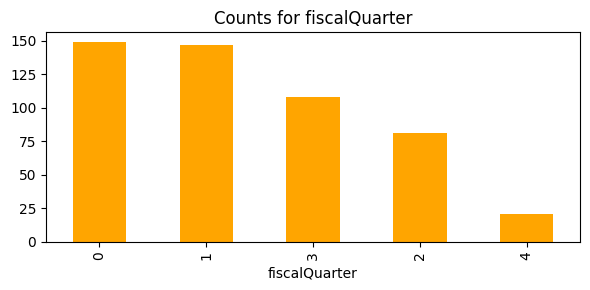

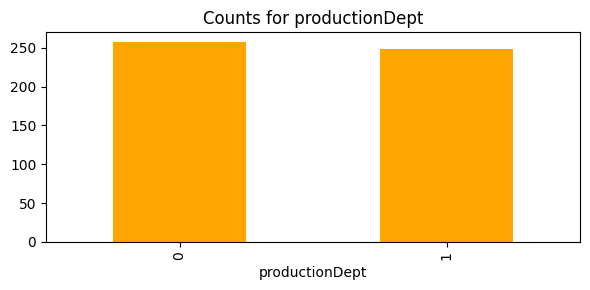

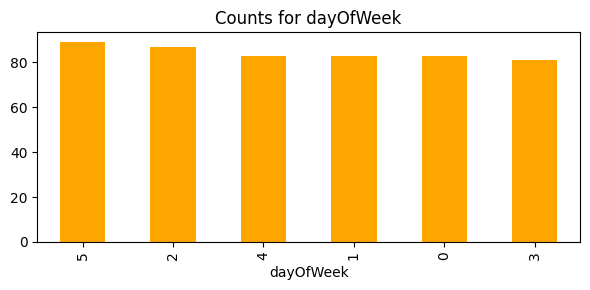

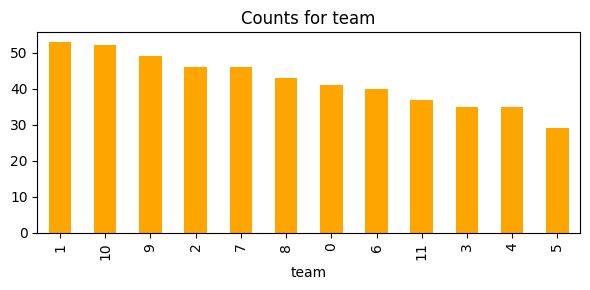

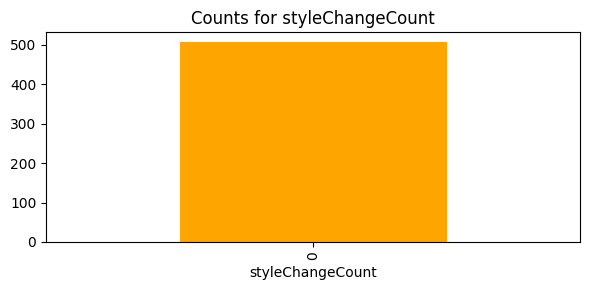

In [131]:
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    df[col].value_counts().plot(kind="bar",color='orange')
    plt.title(f"Counts for {col}")
    plt.tight_layout()
    plt.show()

# fillna("Missing")..nlargest(12)

#  Scaling and Splitting Data

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [133]:
# Separate features and target
X = df.drop(columns=['efficiencyScore'])
y = df['efficiencyScore']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((404, 10), (102, 10))

# Train Models

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Linear Regression

In [135]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Linear Regression Results (After Dropping Columns and Filtering):")
print(f"Train R²: {r2_score(y_train, y_train_pred_lr):.4f}")
print(f"Test R²:  {r2_score(y_test, y_test_pred_lr):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred_lr):.4f}")
print(f"Test MAE:  {mean_absolute_error(y_test, y_test_pred_lr):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_lr)):.4f}")
print(f"Test RMSE:  {np.sqrt(mean_squared_error(y_test, y_test_pred_lr)):.4f}")

Linear Regression Results (After Dropping Columns and Filtering):
Train R²: 0.1646
Test R²:  0.2759
Train MAE: 0.1407
Test MAE:  0.1255
Train RMSE: 0.1814
Test RMSE:  0.1610


Plot


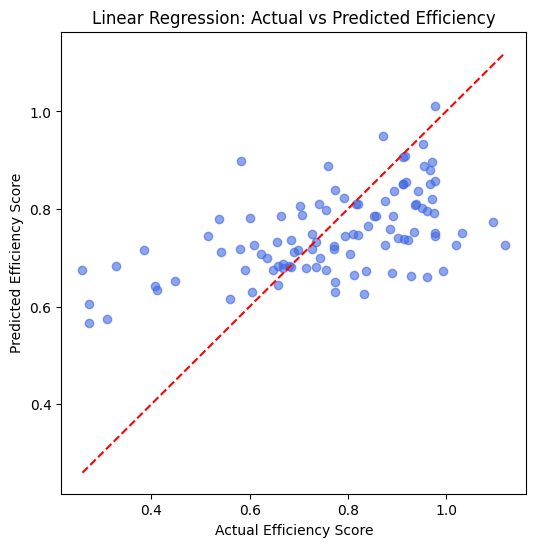

In [136]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, color='royalblue')
plt.xlabel("Actual Efficiency Score")
plt.ylabel("Predicted Efficiency Score")
plt.title("Linear Regression: Actual vs Predicted Efficiency")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Random Forest

In [137]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Results (After Dropping Columns and Filtering):")
print(f"Train R²: {r2_score(y_train, y_train_pred_rf):.4f}")
print(f"Test R²:  {r2_score(y_test, y_test_pred_rf):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred_rf):.4f}")
print(f"Test MAE:  {mean_absolute_error(y_test, y_test_pred_rf):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_rf)):.4f}")
print(f"Test RMSE:  {np.sqrt(mean_squared_error(y_test, y_test_pred_rf)):.4f}")


Random Forest Results (After Dropping Columns and Filtering):
Train R²: 0.8875
Test R²:  0.3318
Train MAE: 0.0498
Test MAE:  0.1155
Train RMSE: 0.0666
Test RMSE:  0.1546


Plot

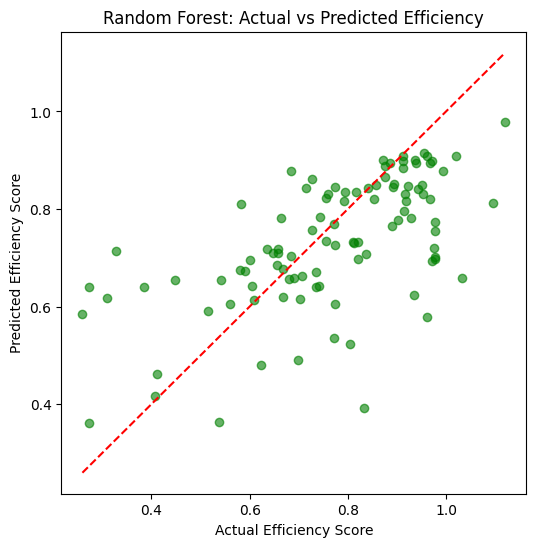

In [138]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.6, color='green')
plt.xlabel("Actual Efficiency Score")
plt.ylabel("Predicted Efficiency Score")
plt.title("Random Forest: Actual vs Predicted Efficiency")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Gradient Boosting


In [139]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Results (After Dropping Columns and Filtering):")
print(f"Train R²: {r2_score(y_train, y_train_pred_gb):.4f}")
print(f"Test R²:  {r2_score(y_test, y_test_pred_gb):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred_gb):.4f}")
print(f"Test MAE:  {mean_absolute_error(y_test, y_test_pred_gb):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_gb)):.4f}")
print(f"Test RMSE:  {np.sqrt(mean_squared_error(y_test, y_test_pred_gb)):.4f}")


Gradient Boosting Results (After Dropping Columns and Filtering):
Train R²: 0.5995
Test R²:  0.3396
Train MAE: 0.0937
Test MAE:  0.1175
Train RMSE: 0.1256
Test RMSE:  0.1537


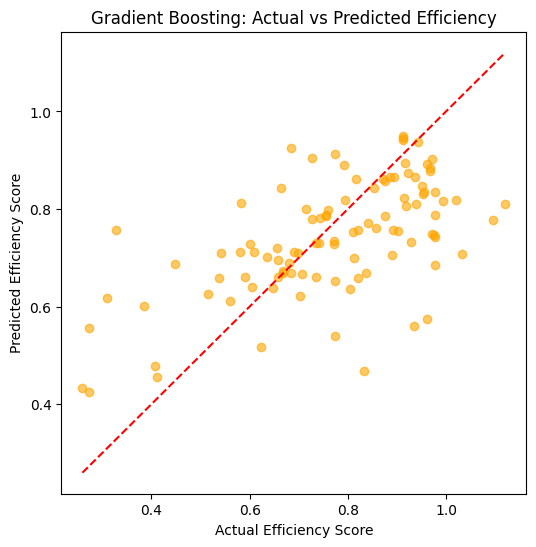

In [140]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_gb, alpha=0.6, color='orange')
plt.xlabel("Actual Efficiency Score")
plt.ylabel("Predicted Efficiency Score")
plt.title("Gradient Boosting: Actual vs Predicted Efficiency")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Model Comparison:
               Model  R2 Score
0  Linear Regression  0.275946
1      Random Forest  0.331797
2  Gradient Boosting  0.339607


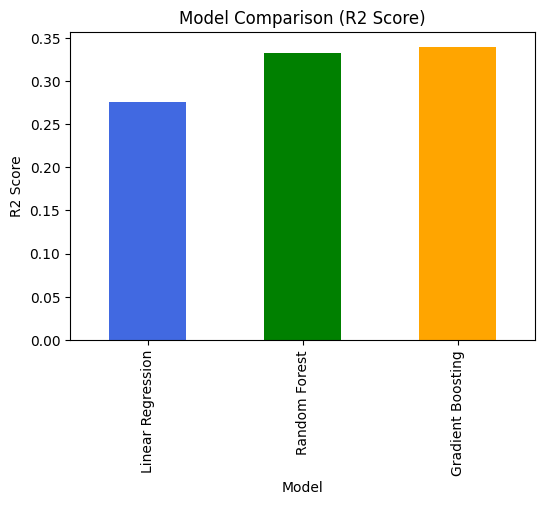

In [141]:

# Store R2 scores for comparison
r2_lr = r2_score(y_test, y_test_pred_lr)
r2_rf = r2_score(y_test, y_test_pred_rf)
r2_gb = r2_score(y_test, y_test_pred_gb)

results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "R2 Score": [r2_lr, r2_rf, r2_gb]
})

print("\nModel Comparison:")
print(results_df)

# Plot comparison
results_df.set_index("Model")["R2 Score"].plot(
    kind="bar", color=["royalblue", "green", "orange"], figsize=(6,4), title="Model Comparison (R2 Score)"
)
plt.ylabel("R2 Score")
plt.show()
